# Visualization of data using MATPLOTLIB

### jupetor contains some magical functions which are starts %

In [15]:
%matplotlib notebook

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
plt.plot?

In [ ]:
help(plt.plot)

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)

When conflicting with *fmt*, keyword arguments take precedence.


**Plotting labelled data**

There's a convenient way for plotting objects with labelled data (i.e.
data that can be accessed by index ``obj['y']``). Instead of giving
the data in *x* and *y*, you can provide the object in the *data*
parameter and just give the labels for *x* and *y*::

>>> plot('xlabel', 'ylabel', data=obj)

All indexable objects are supported. This could e.g. be a `dict`, a
`pandas.DataFame` or a structured numpy array.


**Plotting multiple sets of data**

There are various ways to plot multiple sets of data.

- The most straight forward way is just to call `plot` multiple times.
  Example:

  >>> plot(x1, y1, 'bo')
  >>> plot(x2, y2, 'go')

- Alternatively, if your data is already a 2d array, you can pass it
  directly to *x*, *y*. A separate data set will be drawn for every
  column.

  Example: an array ``a`` where the first column represents the *x*
  values and the other columns are the *y* columns::

  >>> plot(a[0], a[1:])

- The third way is to specify multiple sets of *[x]*, *y*, *[fmt]*
  groups::

  >>> plot(x1, y1, 'g^', x2, y2, 'g-')

  In this case, any additional keyword argument applies to all
  datasets. Also this syntax cannot be combined with the *data*
  parameter.

By default, each line is assigned a different style specified by a
'style cycle'. The *fmt* and line property parameters are only
necessary if you want explicit deviations from these defaults.
Alternatively, you can also change the style cycle using the
'axes.prop_cycle' rcParam.


Parameters
----------
x, y : array-like or scalar
    The horizontal / vertical coordinates of the data points.
    *x* values are optional and default to `range(len(y))`.

    Commonly, these parameters are 1D arrays.

    They can also be scalars, or two-dimensional (in that case, the
    columns represent separate data sets).

    These arguments cannot be passed as keywords.

fmt : str, optional
    A format string, e.g. 'ro' for red circles. See the *Notes*
    section for a full description of the format strings.

    Format strings are just an abbreviation for quickly setting
    basic line properties. All of these and more can also be
    controlled by keyword arguments.

    This argument cannot be passed as keyword.

data : indexable object, optional
    An object with labelled data. If given, provide the label names to
    plot in *x* and *y*.

    .. note::
        Technically there's a slight ambiguity in calls where the
        second label is a valid *fmt*. `plot('n', 'o', data=obj)`
        could be `plt(x, y)` or `plt(y, fmt)`. In such cases,
        the former interpretation is chosen, but a warning is issued.
        You may suppress the warning by adding an empty format string
        `plot('n', 'o', '', data=obj)`.

Other Parameters
----------------
scalex, scaley : bool, optional, default: True
    These parameters determined if the view limits are adapted to
    the data limits. The values are passed on to `autoscale_view`.

**kwargs : `.Line2D` properties, optional
    *kwargs* are used to specify properties like a line label (for
    auto legends), linewidth, antialiasing, marker face color.
    Example::

    >>> plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2)
    >>> plot([1,2,3], [1,4,9], 'rs',  label='line 2')

    If you make multiple lines with one plot command, the kwargs
    apply to all those lines.

    Here is a list of available `.Line2D` properties:

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  markevery: None or int or (int, int) or slice or List[int] or float or (float, float)
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Artist, Event], Tuple[bool, dict]]
  pickradius: float
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  solid_capstyle: {'butt', 'round', 'projecting'}
  solid_joinstyle: {'miter', 'round', 'bevel'}
  transform: `matplotlib.transforms.Transform`
  url: str
  visible: bool
  xdata: 1D array
  ydata: 1D array
  zorder: float

Returns
-------
lines
    A list of `.Line2D` objects representing the plotted data.

See Also
--------
scatter : XY scatter plot with markers of varying size and/or color (
    sometimes also called bubble chart).

Notes
-----
**Format Strings**

A format string consists of a part for color, marker and line::

    fmt = '[marker][line][color]'

Each of them is optional. If not provided, the value from the style
cycle is used. Exception: If ``line`` is given, but no ``marker``,
the data will be a line without markers.

Other combinations such as ``[color][marker][line]`` are also
supported, but note that their parsing may be ambiguous.

**Markers**

=============    ===============================
character        description
=============    ===============================
``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker
=============    ===============================

**Line Styles**

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================

Example format strings::

    'b'    # blue markers with default shape
    'or'   # red circles
    '-g'   # green solid line
    '--'   # dashed line with default color
    '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

The supported color abbreviations are the single letter codes

=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================

and the ``'CN'`` colors that index into the default property cycle.

If the color is the only part of the format string, you can
additionally use any  `matplotlib.colors` spec, e.g. full names
(``'green'``) or hex strings (``'#008000'``).
File:      c:\programdata\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function

<IPython.core.display.Javascript object>


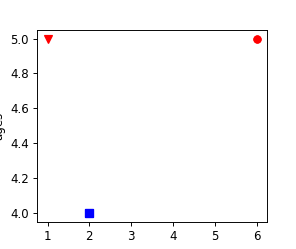

In [34]:
plt.plot(6,5,' ')

In [37]:
plt.plot(1,5,'vr')

In [38]:
plt.plot(6,5,'or')

In [39]:
plt.plot(2,4,'sb')

In [27]:
plt.title('line equation')      # title

Text(0.5, 1, 'line equation')

In [41]:
plt.ylabel('ages')

Text(36.263890431986916, 0.5, 'ages')

In [42]:
plt.xlabel('users')

Text(0.5, 18.893889783488376, 'users')

<IPython.core.display.Javascript object>


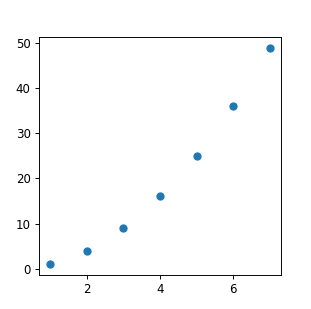

In [45]:
x=[1,2,3,4,5,6,7]
y=[1,4,9,16,25,36,49]
plt.figure()
plt.plot(x,y,'o')
plt.show()

# line plot

<IPython.core.display.Javascript object>


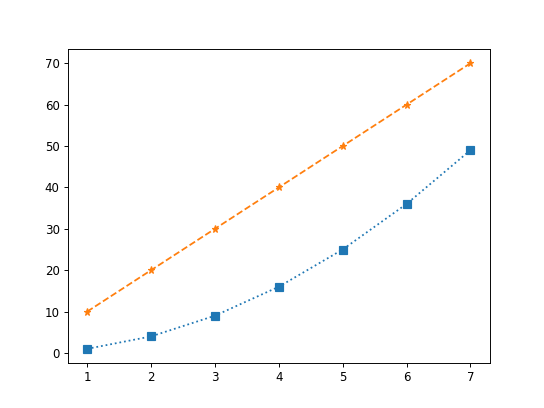

In [56]:
x=[1,2,3,4,5,6,7]
y=[1,4,9,16,25,36,49]
a=[10,20,30,40,50,60,70]
plt.figure()
plt.plot(x,y,'s:')
plt.plot(x,a,'*--')
plt.show()

# ' -- ' of dashed line

<IPython.core.display.Javascript object>


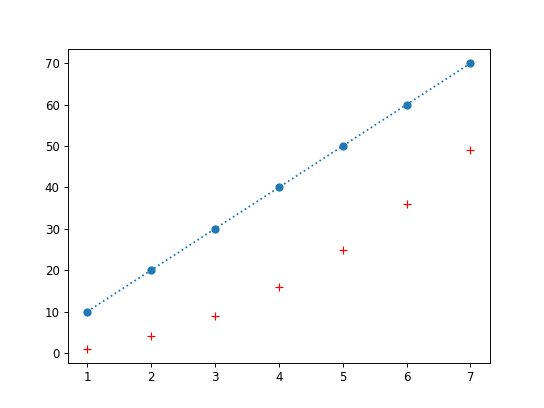

In [51]:
x=[1,2,3,4,5,6,7]
y=[1,4,9,16,25,36,49]
a=[10,20,30,40,50,60,70]
plt.figure()
plt.plot(x,y,'r+')
plt.plot(x,a,'o:')
plt.show()

In [70]:
colors=['red']*8
colors.extend(['green','blue'])
colors,x

(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'blue'],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<IPython.core.display.Javascript object>


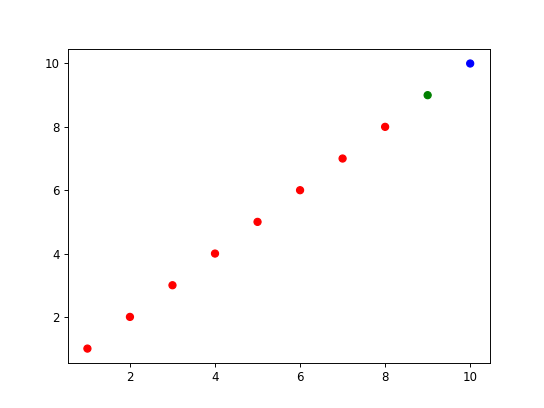

In [71]:
plt.figure()
x=[1,2,3,4,5,6,7,8,9,10]
y=x
plt.scatter(x,y,c=colors)
plt.show()

# linear equation

<IPython.core.display.Javascript object>


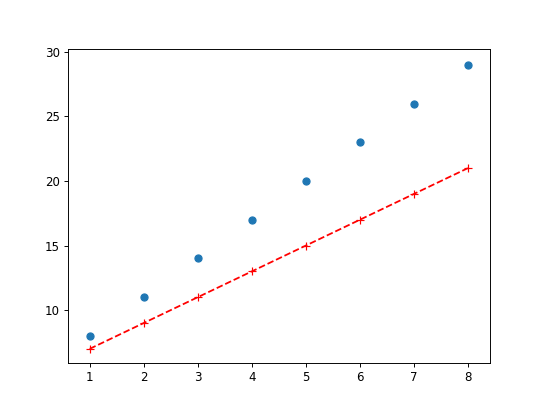

In [84]:
x=[1,2,3,4,5,6,7,8]
a=[3*i+5 for i in x]
y=[2*i+5 for i in x]
plt.figure()
plt.plot(x,y,'r+--')
plt.scatter(x,a)


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
orange_width=[1,2,3,4,5]
orange_height=[5,4,3,2,1]
mango_width=[6,7,8,9,10]
mango_height=[10,9,8,7,6]



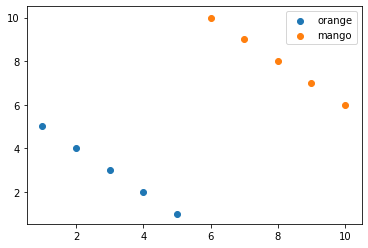

In [11]:

plt.figure()
plt.scatter(orange_width,orange_height,label='orange')
plt.scatter(mango_width,mango_height,label='mango')
plt.legend()
plt.show()

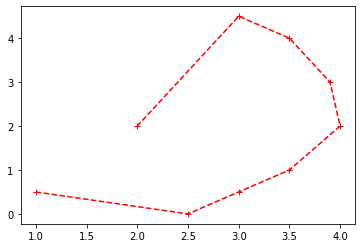

In [16]:
x=[1,2.5,3,3.5,4,3.9,3.5,3,2]
y=[0.5,0,0.5,1,2,3,4,4.5,2]
plt.figure()
plt.plot(x,y,'r+--')
plt.show()